# 3.1. Load and prepare Life satisfaction data

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
import urllib.request
from pathlib import Path

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)


In [36]:
# Where to save the figures
IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# data_root = "https://github.com/ageron/data/tree/main/lifesat/gdp_per_capita.csv" is a html website

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [5]:
urllib.request.urlretrieve?

Signature: urllib.request.urlretrieve(url, filename=None, reporthook=None, data=None)
Docstring:
Retrieve a URL into a temporary location on disk.

Requires a URL argument. If a filename is passed, it is used as
the temporary file location. The reporthook argument should be
a callable that accepts a block number, a read size, and the
total file size of the URL target. The data argument should be
valid URL encoded data.

If a filename is passed and the URL points to a local resource,
the result is a copy from local file to new file.

Returns a tuple containing the path to the newly created
data file as well as the resulting HTTPMessage object.
File:      d:\anaconda\envs\homl3\lib\urllib\request.py
Type:      function

In [6]:
from urllib.request import urlopen

# https://github.com/ageron/data/raw/main/lifesat/gdp_per_capita.csv
# equals to
# https://raw.githubusercontent.com/ageron/data/main/lifesat/gdp_per_capita.csv 
# is a csv document 

# myURL = urlopen("https://raw.githubusercontent.com/ageron/data/main/lifesat/oecd_bli.csv")
# print(myURL.read())

In [11]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [12]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

In [13]:
gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.head()

,Entity,"GDP per capita, PPP (constant 2017 international $)"
18,Afghanistan,1978.961579
49,Africa Eastern and Southern,3387.594670
80,Africa Western and Central,4003.158913
111,Albania,13295.410885
142,Algeria,10681.679297


In [14]:
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.head()

,Country,GDP per capita (USD)
18,Afghanistan,1978.961579
49,Africa Eastern and Southern,3387.594670
80,Africa Western and Central,4003.158913
111,Albania,13295.410885
142,Algeria,10681.679297


In [17]:
# gdp_per_capita.set_index?

In [18]:
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [20]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
# equals to 
# oecd_bli = oecd_bli.pivot(index = "Country", columns = "Indicator")["Value"]
oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [21]:
oecd_bli = oecd_bli.pivot?

Signature: oecd_bli.pivot(*, columns, index=<no_default>, values=<no_default>) -> 'DataFrame'
Docstring:
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a "pivot" table) based on column values. Uses
unique values from specified `index` / `columns` to form axes of the
resulting DataFrame. This function does not support data
aggregation, multiple values will result in a MultiIndex in the
columns. See the :ref:`User Guide <reshaping>` for more on reshaping.

Parameters
----------
columns : str or object or a list of str
    Column to use to make new frame's columns.
index : str or object or a list of str, optional
    Column to use to make new frame's index. If not given, uses existing index.
values : str, object or a list of the previous, optional
    Column(s) to use for populating new frame's values. If not
    specified, all remaining columns will be used and the result will
    have hierarchically indexed columns.

Returns
-------
DataFrame


In [23]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)

full_country_stats.head()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita (USD)
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,73.0,18.12,43.0,36.1,13.7,NaN,NaN,18.0,...,88.0,NaN,NaN,NaN,NaN,14.92,73.0,67.0,NaN,11466.189672
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1,13441.492952
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2,14063.982505
Mexico,16.0,25.5,38.0,28.70,61.0,41.8,18.1,NaN,NaN,20.0,...,81.0,1.0,66.0,3.2,416.0,NaN,63.0,68.0,15.2,17887.750736
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5,23324.524751


In [25]:
full_country_stats[[gdppc_col]].head() # DataFrame

,GDP per capita (USD)
Country,
South Africa,11466.189672
Colombia,13441.492952
Brazil,14063.982505
Mexico,17887.750736
Chile,23324.524751


In [26]:
full_country_stats[gdppc_col].head() # Series

Country
South Africa    11466.189672
Colombia        13441.492952
Brazil          14063.982505
Mexico          17887.750736
Chile           23324.524751
Name: GDP per capita (USD), dtype: float64

In [27]:
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]
full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [28]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [29]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

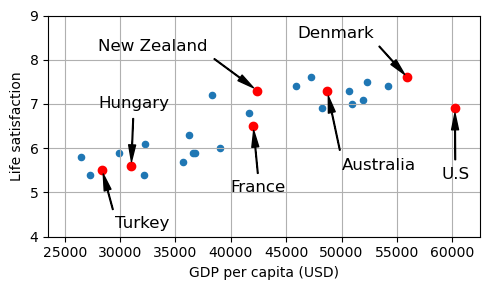

In [37]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,x=gdppc_col, y=lifesat_col)
min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country,postext in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S" if country == "United States" else country
    plt.annotate(country,xy = (pos_data_x,pos_data_y),
                xytext = postext,fontsize = 12,
                arrowprops=dict(facecolor='black', width=0.5,
                shrink=0.08, headwidth=5))
    plt.plot(pos_data_x,pos_data_y,"ro")

plt.axis([min_gdp,max_gdp,min_life_sat,max_life_sat])

save_fig('money_happy_scatterplot')
plt.show()

In [31]:
country_stats.plot?

Signature:      country_stats.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x000002807A4EF910>
File:           d:\anaconda\envs\homl3\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : a

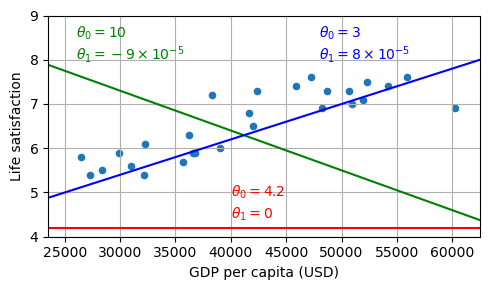

In [38]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('tweaking_model_params_plot')
plt.show()


In [40]:
# plt.text?

In [41]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

In [44]:
lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05
